<a href="https://colab.research.google.com/github/MadhurimaPaul-87/InfoPillar-Solution-PVT-LTD/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MADHURIMA PAUL**

# **InfoPillar Solution PVT LTD Internship task**

# **Fake News Detection Project**

# **Dataset:**https://bit.ly/3FxCSC4

# **1. Goal: Build a system to identify unreliable/fake news**

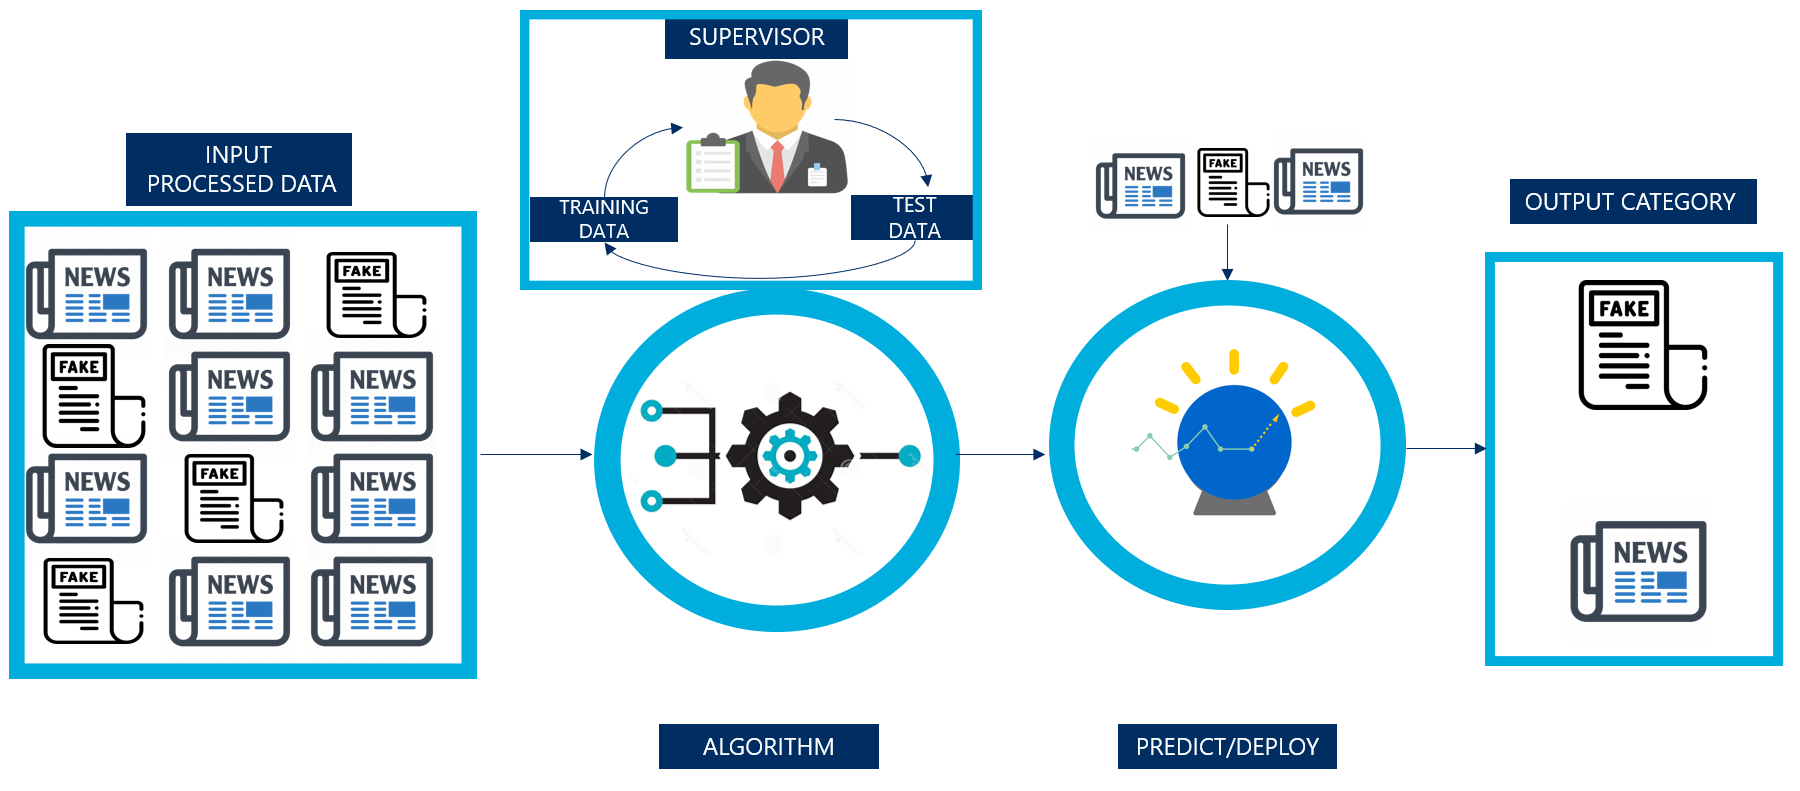

## **2. Import required libraries**

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import re #Regular expressions 
import nltk #Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import itertools
import seaborn as sns

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

Stopwords are words which occur frequently in a corpus. e.g a, an, the, in. Frequently occurring words are removed from the corpus for the purpose of text-normalization.

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Printing the stopwords in English
# We will have to remove these from the corpus during our analysis and pre-processing
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **3. Data Pre-processing and Analysis**

Typically, we follow below standard steps from text pre-processing and feature engineering standpoint

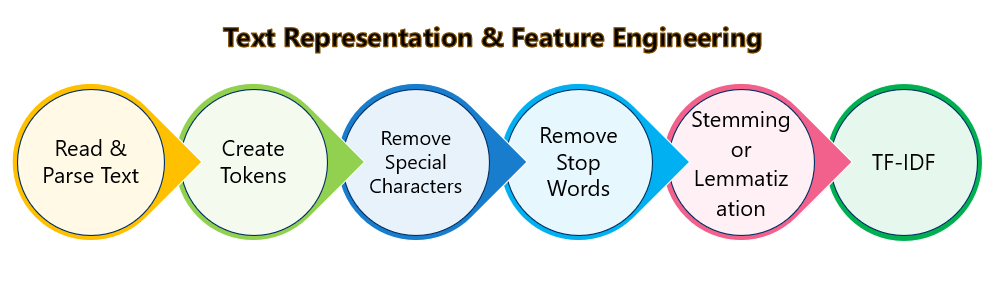

# 3.1 Load the dataset, Read and Parse Text

In [35]:
# First let's load the dataset
news_dataset = pd.read_csv('/content/news.csv')

In [9]:
news_dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
news_dataset.shape

(6335, 4)

In [11]:
# Checking for missing values
news_dataset.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [12]:
# We will use all text fields such as Title, Author & text description to train our model 
# to help predict if it is real or unreliable news
news_dataset['text_corpus'] = news_dataset['title']+' '+news_dataset['text']

In [13]:
print(news_dataset['text_corpus'])

0       You Can Smell Hillary’s Fear Daniel Greenfield...
1       Watch The Exact Moment Paul Ryan Committed Pol...
2       Kerry to go to Paris in gesture of sympathy U....
3       Bernie supporters on Twitter erupt in anger ag...
4       The Battle of New York: Why This Primary Matte...
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text_corpus, Length: 6335, dtype: object


In [14]:
news_dataset.head()

,Unnamed: 0,title,text,label,text_corpus
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


In [15]:
news_dataset.label.replace(('REAL', 'FAKE'), (1, 0), inplace=True)

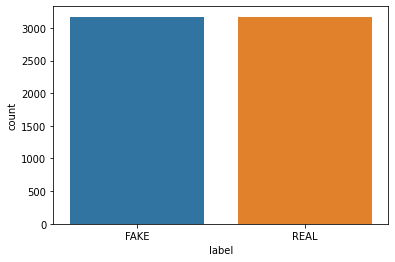

In [38]:
#checking number of real and fake news
sns.countplot(x = 'label',data = news_dataset)

In [16]:
# Now we will separate the data and label i.e. text_corpus and label fields
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [17]:
X = news_dataset['text_corpus']
print(X)

0       You Can Smell Hillary’s Fear Daniel Greenfield...
1       Watch The Exact Moment Paul Ryan Committed Pol...
2       Kerry to go to Paris in gesture of sympathy U....
3       Bernie supporters on Twitter erupt in anger ag...
4       The Battle of New York: Why This Primary Matte...
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text_corpus, Length: 6335, dtype: object


In [18]:
print(Y)

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64


In [19]:
X.head()

0    You Can Smell Hillary’s Fear Daniel Greenfield...
1    Watch The Exact Moment Paul Ryan Committed Pol...
2    Kerry to go to Paris in gesture of sympathy U....
3    Bernie supporters on Twitter erupt in anger ag...
4    The Battle of New York: Why This Primary Matte...
Name: text_corpus, dtype: object

# 3.2 Remove Special Characters

* Pick all alphabet characters - lowercase and uppercase...all others such as numbers and punctuations will be removed.
* Numbers or punctuations will be replaced by a whitespace

# 3.3 Remove Stopwords

* Remove standard english stopwords

# 3.4 Stemming or Lemmatization

* Here we will try to apply stemming - objective is to reduce the word to it's root word.
* For example: actor, actress, acting, action --> act

In [20]:
port_stem = PorterStemmer()

def stemming(content):
    # Pick all alphabet characters - lowercase and uppercase...all others such as numbers and punctuations will be removed. Numbers or punctuations will be replaced by a whitespace
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    # Converting all letters to lowercase 
    stemmed_content = stemmed_content.lower()
    # Converting all to a splitted case or a list
    stemmed_content = stemmed_content.split()
    # Applying stemming, so we get the root words wherever possible + remove stopwords as well
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    # Join all the words in final content
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [21]:
news_dataset['text_corpus'] = news_dataset['text_corpus'].apply(stemming)

In [22]:
print(news_dataset['text_corpus'])

0       smell hillari fear daniel greenfield shillman ...
1       watch exact moment paul ryan commit polit suic...
2       kerri go pari gestur sympathi u secretari stat...
3       berni support twitter erupt anger dnc tri warn...
4       battl new york primari matter primari day new ...
                              ...                        
6330    state depart say find email clinton specialist...
6331    p pb stand plutocrat pentagon p pb stand pluto...
6332    anti trump protest tool oligarchi inform anti ...
6333    ethiopia obama seek progress peac secur east a...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: text_corpus, Length: 6335, dtype: object


In [23]:
# Separating data and label
X = news_dataset['text_corpus'].values
Y = news_dataset['label'].values

In [24]:
print(X)

['smell hillari fear daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exactli hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir left wing establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey j edgar hoover bizarr headlin jame comey role recal hoover fbi fairli practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim sca

In [25]:
print(Y)

[0 0 1 ... 0 1 1]


# 3.5 TF-IDF (Term Frequency, Inverse Document Frequency)

**Converting Textual data to Numerical data**

* We will use TF-IDF Vectorizer
* TF-IDF Vectorizer will convert textual data to numerical data

In [26]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [27]:
print(X)

  (0, 43422)	0.030377490785439623
  (0, 43299)	0.01823544823237207
  (0, 42991)	0.03695008224641025
  (0, 42987)	0.0240047103426603
  (0, 42960)	0.033095587951021126
  (0, 42927)	0.023617159002990093
  (0, 42925)	0.008737566380060865
  (0, 42859)	0.01579441180999399
  (0, 42799)	0.016678000766270875
  (0, 42712)	0.02838676929430383
  (0, 42711)	0.016808976313346893
  (0, 42674)	0.038267002580905846
  (0, 42632)	0.0425815201254337
  (0, 42535)	0.03488450955557637
  (0, 42480)	0.035809250475034055
  (0, 42466)	0.018399497997839874
  (0, 42387)	0.013920814295763086
  (0, 42356)	0.06194951909157974
  (0, 42250)	0.01149781838280218
  (0, 42219)	0.027015533479815255
  (0, 42143)	0.02866891016254173
  (0, 42082)	0.032730285384589844
  (0, 42034)	0.016336949950311784
  (0, 41986)	0.053305929475663996
  (0, 41954)	0.07035532559822699
  :	:
  (6334, 3921)	0.028594602233426542
  (6334, 3920)	0.02642484352841616
  (6334, 3742)	0.035328281056127245
  (6334, 3735)	0.020487351480229746
  (6334, 3457)

# **4. Modeling & Model Evaluation**

Splitting the data into test and train datasets

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.18, stratify=Y, random_state=124)

**Training the model (model1 : Logistic Regression)**

In [29]:
# Training the model
model1 = LogisticRegression()

model1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Model Evaluation**

In [30]:
# Accuracy Score on Training Data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  0.9534077782056218
Accuracy score on the test data:  0.9141104294478528


In [31]:
# Function to plot confusion Matrix
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization


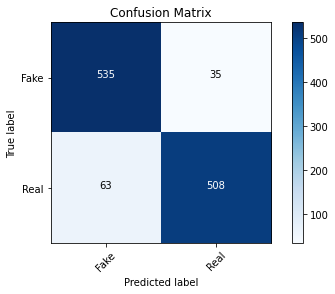

In [32]:
cm = metrics.confusion_matrix(Y_test, X_test_prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [33]:
# Classification report for test data
classification_report(Y_test, X_test_prediction)

'              precision    recall  f1-score   support\n\n           0       0.89      0.94      0.92       570\n           1       0.94      0.89      0.91       571\n\n    accuracy                           0.91      1141\n   macro avg       0.92      0.91      0.91      1141\nweighted avg       0.92      0.91      0.91      1141\n'